In [5]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (if you're planning to build models later)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Display options for large datasets
pd.set_option('display.max_columns', None)


In [6]:
# pandas: For data manipulation and working with DataFrames.
# numpy: For numerical operations.
# matplotlib.pyplot: For basic plotting.
# seaborn: For advanced statistical plotting (e.g., correlation heatmaps).
#sklearn.model_selection: For splitting the data into training and testing sets (if you plan to build a model).
# sklearn.preprocessing: For encoding categorical variables.
# sklearn.impute: For handling missing values.

In [7]:
# Load the Titanic dataset into a Pandas DataFrame
df = pd.read_csv('Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the basic structure of the dataset (e.g., data types, non-null counts)
print(df.info())

# Check for missing values in each column
print(df.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [8]:
# pd.read_csv('Titanic-Dataset.csv'): This function reads the CSV file into a Pandas DataFrame.
# df.head(): Displays the first 5 rows of the dataset, so you can quickly get an overview of the data.
# df.info(): Provides information about the DataFrame, including the column names, data types, and number of non-null values.
# df.isnull().sum(): Shows the number of missing values in each column.

In [9]:
# Summary of the DataFrame
print("Summary of the DataFrame:")
print(df.describe())

# Summary of the DataFrame including non-numeric columns
print("\nSummary with non-numeric columns included:")
print(df.describe(include='all'))

# Information about the DataFrame (columns, data types, non-null counts)
print("\nDataFrame Information:")
print(df.info())

# Check for missing values across the entire dataset
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Display the data types of each column
print("\nData Types of Each Column:")
print(df.dtypes)


Summary of the DataFrame:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary with non-numeric columns included:
        Pas

In [10]:
# df.describe(): This gives a summary of statistics for numeric columns, such as count, mean, standard deviation, min, max, and percentiles.
# df.describe(include='all'): This provides summary statistics for both numeric and categorical (non-numeric) columns, including counts, unique values, top values, and frequencies.
# df.info(): Gives details about the DataFrame like the number of entries, column names, data types, and the count of non-null entries.
# df.isnull().sum(): Shows the number of missing values in each column.
# df.dtypes: Displays the data type of each column (e.g., int64, float64, object for strings).

In [11]:
# Handle Missing Values in the Titanic dataset

# Fill missing 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing 'Embarked' with the mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill missing 'Fare' with the median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# Optionally, drop rows where 'Cabin' has missing values (if it's not needed for analysis)
df = df.dropna(subset=['Cabin'])

# Check for missing values after handling them
print("\nMissing Values After Handling:")
print(df.isnull().sum())



Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
# fillna(df['Age'].median()): Fills missing Age values with the median.
# fillna(df['Embarked'].mode()[0]): Fills missing Embarked values with the most frequent value (mode).
# fillna(df['Fare'].median()): Fills missing Fare values with the median.
# dropna(subset=['Cabin']): Optionally drops rows with missing Cabin values (since Cabin may have too many missing values to be useful).

In [13]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check if duplicates have been removed
print("\nDuplicate Rows After Removal:")
print(df.duplicated().sum())



Duplicate Rows After Removal:
0


In [14]:
# df.drop_duplicates(): This removes any rows that are completely identical to another row. It returns a new DataFrame with duplicates removed.
# df.duplicated().sum(): This checks if there are any duplicate rows left in the dataset after removing them. It will return 0 if no duplicates are left.

In [16]:
#Extract Titles from Names

# Extract titles from the 'Name' column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Display the first few rows to check the extracted titles
print("\nFirst few rows with extracted titles:")
print(df[['Name', 'Title']].head())

# Check the unique titles in the dataset
print("\nUnique Titles in the Dataset:")
print(df['Title'].unique())



First few rows with extracted titles:
                                                 Name Title
1   Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
6                             McCarthy, Mr. Timothy J    Mr
10                    Sandstrom, Miss. Marguerite Rut  Miss
11                           Bonnell, Miss. Elizabeth  Miss

Unique Titles in the Dataset:
['Mrs' 'Mr' 'Miss' 'Master' 'Dr' 'Mme' 'Major' 'Lady' 'Sir' 'Mlle' 'Col'
 'Capt' 'the Countess']


In [17]:
# x.split(',')[1].split('.')[0].strip():
# 
# First, it splits the name by the comma (,) to separate the surname.
# Then, it splits the second part by a period (.) to isolate the title.
# Finally, .strip() removes any leading or trailing spaces from the title.
# df['Title']: Adds a new column to the DataFrame with the extracted titles.
# 
# df[['Name', 'Title']].head(): Displays the first few rows to verify that the titles have been extracted correctly.
# 
# df['Title'].unique(): Shows all the unique titles present in the dataset.

In [18]:
# Visualizing  Demographic Variables

C:\Users\biraj\AppData\Local\Temp\ipykernel_52596\505876616.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')
C:\Users\biraj\AppData\Local\Temp\ipykernel_52596\505876616.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set2')
C:\Users\biraj\AppData\Local\Temp\ipykernel_52596\505876616.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='Set1')


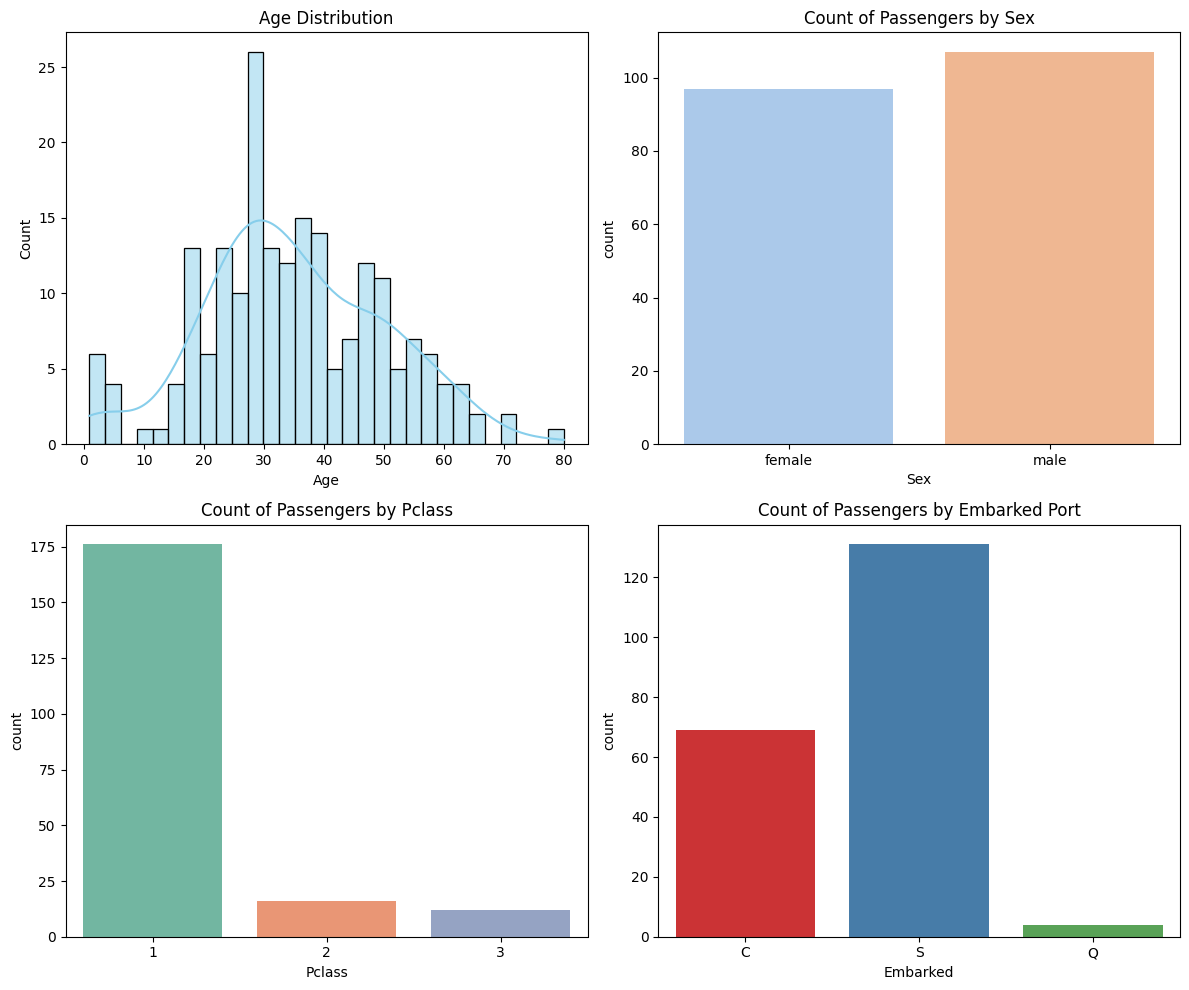

In [19]:
# Set up the size of the plots
plt.figure(figsize=(12, 10))

# Plot 1: Age Distribution (Histogram and KDE)
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue', line_kws={'color': 'black'})
plt.title('Age Distribution')

# Plot 2: Count plot for 'Sex' (Male vs Female)
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Count of Passengers by Sex')

# Plot 3: Count plot for 'Pclass' (Passenger Class Distribution)
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Pclass', palette='Set2')
plt.title('Count of Passengers by Pclass')

# Plot 4: Count plot for 'Embarked' (Port of Embarkation)
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Embarked', palette='Set1')
plt.title('Count of Passengers by Embarked Port')

# Display the plots
plt.tight_layout()
plt.show()


In [20]:
# 1. Distribution of Age
# We can visualize the distribution of passengers' ages using a histogram or a KDE (Kernel Density Estimate).
# 
# 2. Count Plot for Sex
# A count plot helps visualize the count of male vs female passengers.
# 
# 3. Count Plot for Pclass (Passenger Class)
# This will show how many passengers were in each class.
# 
# 4. Count Plot for Embarked (Port of Embarkation)
# This will show the distribution of passengers based on the port where they boarded the ship.

In [21]:
# sns.histplot(df['Age'], kde=True, bins=30): Plots a histogram for the Age column and overlays a Kernel Density Estimate (KDE) curve for a smoother distribution.
# sns.countplot(data=df, x='Sex'): Creates a count plot for the Sex column to show the number of male and female passengers.
# sns.countplot(data=df, x='Pclass'): Creates a count plot for Pclass to show how passengers are distributed across different classes.
# sns.countplot(data=df, x='Embarked'): Creates a count plot for the Embarked column to show the number of passengers who boarded from different ports (C, Q, S).
# plt.tight_layout(): Ensures the plots are neatly arranged without overlap.

In [22]:
# Numerical Variables Histogram

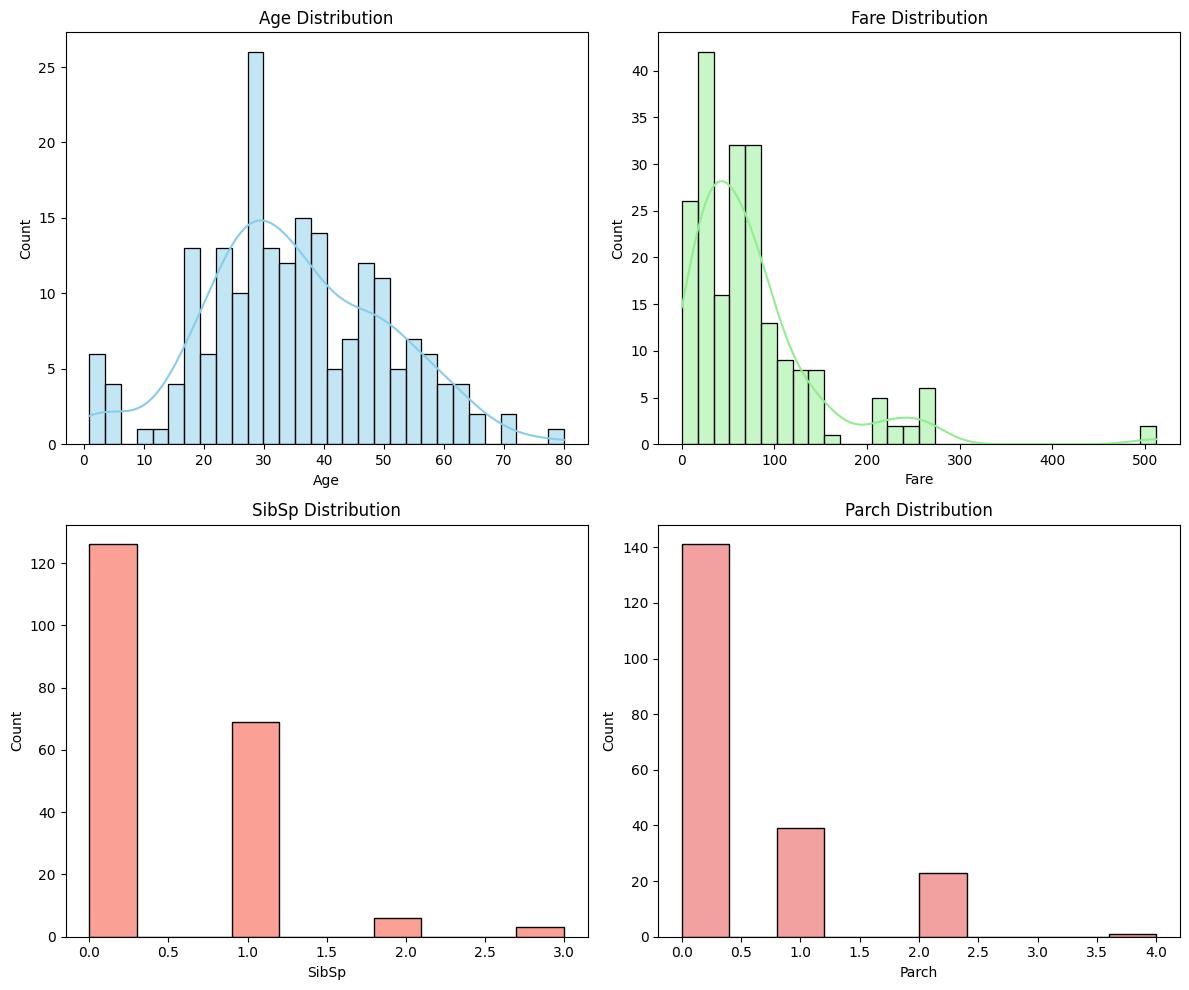

In [23]:
# Set up the size of the plots
plt.figure(figsize=(12, 10))

# Plot 1: Histogram for 'Age' (Age Distribution)
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue', line_kws={'color': 'black'})
plt.title('Age Distribution')

# Plot 2: Histogram for 'Fare' (Fare Distribution)
plt.subplot(2, 2, 2)
sns.histplot(df['Fare'], kde=True, bins=30, color='lightgreen', line_kws={'color': 'black'})
plt.title('Fare Distribution')

# Plot 3: Histogram for 'SibSp' (Siblings/Spouses Aboard)
plt.subplot(2, 2, 3)
sns.histplot(df['SibSp'], kde=False, bins=10, color='salmon')
plt.title('SibSp Distribution')

# Plot 4: Histogram for 'Parch' (Parents/Children Aboard)
plt.subplot(2, 2, 4)
sns.histplot(df['Parch'], kde=False, bins=10, color='lightcoral')
plt.title('Parch Distribution')

# Display the plots
plt.tight_layout()
plt.show()


In [24]:
# sns.histplot(df['Age'], kde=True, bins=30): Creates a histogram for the Age column with 30 bins and overlays a KDE curve to better visualize the distribution.
# sns.histplot(df['Fare'], kde=True, bins=30): Creates a histogram for the Fare column with 30 bins and overlays a KDE curve.
# sns.histplot(df['SibSp'], kde=False, bins=10): Plots the distribution of SibSp (number of siblings/spouses aboard) without KDE.
# sns.histplot(df['Parch'], kde=False, bins=10): Plots the distribution of Parch (number of parents/children aboard) without KDE.
# plt.tight_layout(): Ensures the subplots are neatly arranged.

In [25]:
# The Age histogram will help you understand how the age distribution looks, whether it's skewed, and if there are any outliers.
# The Fare histogram will show how fares are distributed. It often has a long tail because there may be a few passengers who paid very high fares.
# The SibSp and Parch histograms will give insight into the number of family members aboard.

In [26]:
# Categorical Variables Bar Plots

C:\Users\biraj\AppData\Local\Temp\ipykernel_52596\2442419640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='pastel')
C:\Users\biraj\AppData\Local\Temp\ipykernel_52596\2442419640.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set2')
C:\Users\biraj\AppData\Local\Temp\ipykernel_52596\2442419640.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='Set1')
C:\Users\biraj\AppData\Local\Temp\ipykernel_52596\2442419640.py:21: FutureWarning: 

Pas

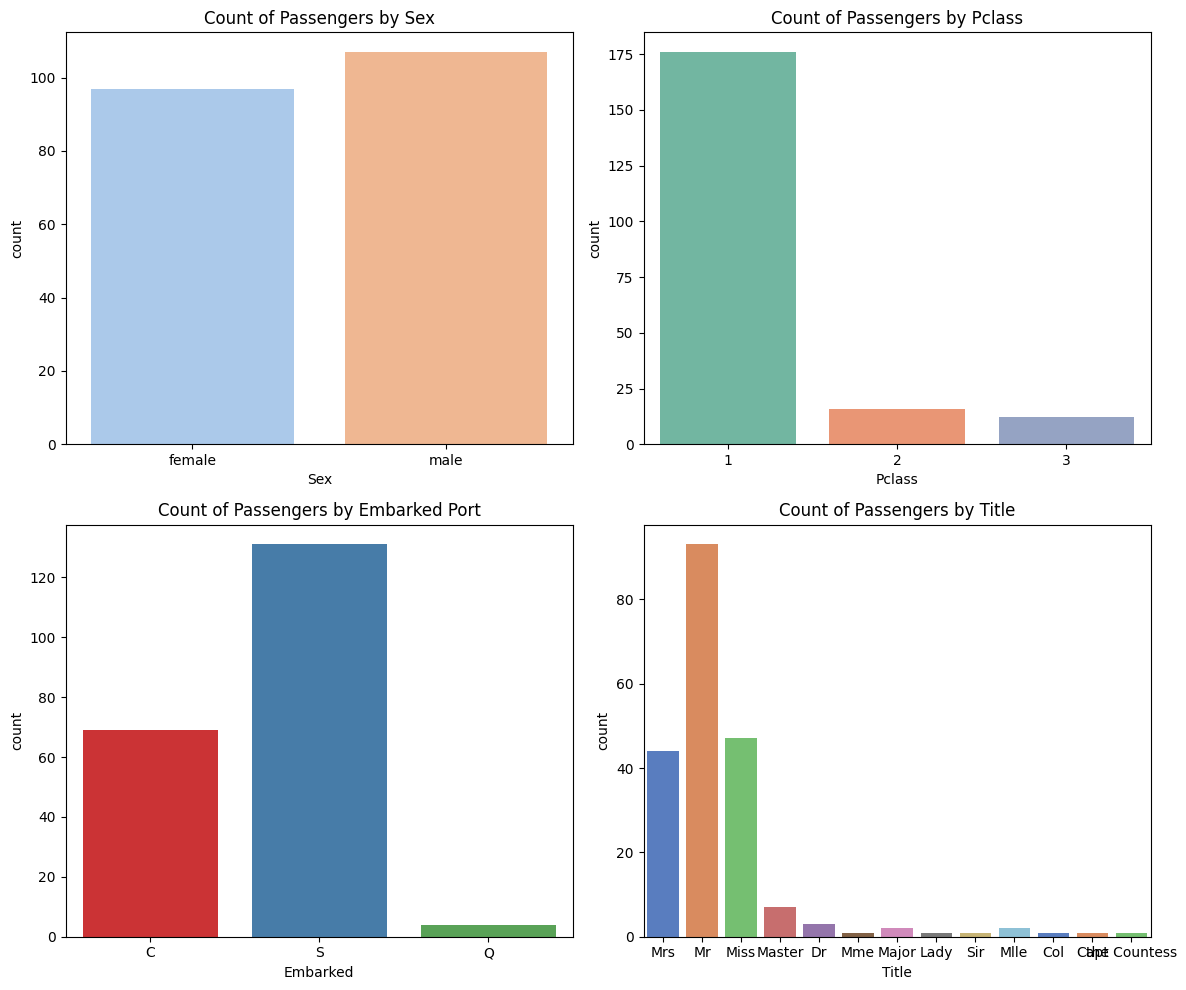

In [27]:
# Set up the size of the plots
plt.figure(figsize=(12, 10))

# Plot 1: Bar plot for 'Sex' (Male vs Female)
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title('Count of Passengers by Sex')

# Plot 2: Bar plot for 'Pclass' (Passenger Class Distribution)
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Pclass', palette='Set2')
plt.title('Count of Passengers by Pclass')

# Plot 3: Bar plot for 'Embarked' (Port of Embarkation)
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Embarked', palette='Set1')
plt.title('Count of Passengers by Embarked Port')

# Plot 4: Bar plot for 'Title' (Passenger Titles)
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Title', palette='muted')
plt.title('Count of Passengers by Title')

# Display the plots
plt.tight_layout()
plt.show()


In [28]:
# sns.countplot(data=df, x='Sex'): Creates a bar plot for the Sex column, showing the count of male and female passengers.
# sns.countplot(data=df, x='Pclass'): Creates a bar plot for Pclass, showing how many passengers are in each class.
# sns.countplot(data=df, x='Embarked'): Creates a bar plot for Embarked, showing the number of passengers who boarded from each port (C, Q, S).
# sns.countplot(data=df, x='Title'): Creates a bar plot for Title, showing the count of passengers for each extracted title (e.g., Mr, Mrs, Miss, etc.).
# plt.tight_layout(): Ensures the subplots are neatly arranged without overlap.

In [29]:
# the Sex bar plot will show how many male and female passengers were aboard.
# The Pclass bar plot will show how passengers are distributed across the three classes.
# The Embarked bar plot will display the number of passengers who boarded from each of the three ports.
# The Title bar plot will show the count of each extracted title from the names.

In [30]:
# Display Visualization

In [32]:
# Calculate Family Sizes

In [33]:
# Calculate family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Display the first few rows to check the new column
print("\nFirst few rows with FamilySize:")
print(df[['SibSp', 'Parch', 'FamilySize']].head())

# Check the distribution of family sizes
print("\nFamily Size Distribution:")
print(df['FamilySize'].describe())



First few rows with FamilySize:
    SibSp  Parch  FamilySize
1       1      0           2
3       1      0           2
6       0      0           1
10      1      1           3
11      0      0           1

Family Size Distribution:
count    204.000000
mean       1.877451
std        1.082636
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: FamilySize, dtype: float64


In [34]:
# df['FamilySize'] = df['SibSp'] + df['Parch'] + 1: This creates a new column FamilySize by adding the number of siblings/spouses (SibSp) and parents/children (Parch) aboard, and adding 1 to include the passenger themselves.
# df[['SibSp', 'Parch', 'FamilySize']].head(): Displays the first few rows to check if the family size has been correctly calculated.
# df['FamilySize'].describe(): Shows summary statistics (like mean, min, max, etc.) for the FamilySize column, helping you understand the distribution of family sizes.

In [35]:
# Store Family Sizes

In [36]:
# Save the updated DataFrame with FamilySize column to a new CSV file
df.to_csv('Titanic_Dataset_with_FamilySize.csv', index=False)

# Confirm the file is saved
print("The dataset with FamilySize column has been saved to 'Titanic_Dataset_with_FamilySize.csv'.")


The dataset with FamilySize column has been saved to 'Titanic_Dataset_with_FamilySize.csv'.


In [37]:
# df.to_csv('Titanic_Dataset_with_FamilySize.csv', index=False): This saves the DataFrame with the new FamilySize column to a new CSV file named Titanic_Dataset_with_FamilySize.csv. The index=False argument ensures that the index column is not saved to the file.
# The print statement will confirm the successful saving of the updated dataset.

In [38]:
# Summary Statistics for Age

In [39]:
# Summary statistics for Age
age_summary = df['Age'].describe()

# Display the summary statistics for Age
print("\nSummary Statistics for Age:")
print(age_summary)



Summary Statistics for Age:
count    204.000000
mean      35.100098
std       15.100836
min        0.920000
25%       25.000000
50%       34.000000
75%       47.000000
max       80.000000
Name: Age, dtype: float64


In [40]:
# df['Age'].describe(): This method computes and returns a summary of statistics for the Age column, including:
# Count: The number of non-null entries in Age.
# Mean: The average age.
# Std: The standard deviation of ages.
# Min: The minimum age.
# 25%: The 25th percentile (first quartile).
# 50%: The 50th percentile (median).
# 75%: The 75th percentile (third quartile).
# Max: The maximum age.

In [41]:
# Visualize Ticket Fare Distribution

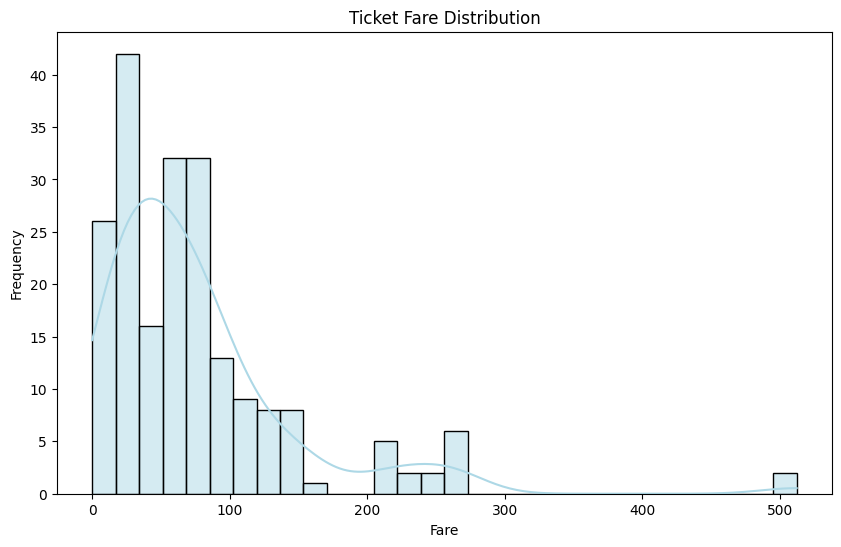

In [42]:
# Plotting the Ticket Fare Distribution
plt.figure(figsize=(10, 6))

# Using Seaborn's histplot to show the distribution of the 'Fare' column
sns.histplot(df['Fare'], kde=True, bins=30, color='lightblue', line_kws={'color': 'black'})

# Adding titles and labels
plt.title('Ticket Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [43]:
# sns.histplot(df['Fare'], kde=True, bins=30, color='lightblue', line_kws={'color': 'black'}):
# 
# df['Fare']: The column containing ticket fares.
# kde=True: This overlays a Kernel Density Estimate (KDE) curve on the histogram to show the probability distribution of fares.
# bins=30: Divides the range of fare values into 30 bins.
# color='lightblue': Sets the color for the bars of the histogram.
# line_kws={'color': 'black'}: Sets the color of the KDE curve to black.
# plt.title(), plt.xlabel(), and plt.ylabel(): Add titles and axis labels for clarity.
# 
# plt.show(): Displays the plot.

In [44]:
# This histogram will show the distribution of fares and how they are spread across different price ranges.
# The KDE curve will give a smooth estimate of the distribution, highlighting any peaks or skewness in the data.

In [45]:
# Analyze Spread and Central Tendency of Fares

In [46]:
# Central tendency and spread measures for 'Fare'
mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()
std_fare = df['Fare'].std()
var_fare = df['Fare'].var()
min_fare = df['Fare'].min()
max_fare = df['Fare'].max()

# Interquartile range (IQR)
Q1 = df['Fare'].quantile(0.25)  # 25th percentile
Q3 = df['Fare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Display the results
print("Spread and Central Tendency of Fares:")
print(f"Mean Fare: {mean_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")
print(f"Standard Deviation of Fare: {std_fare:.2f}")
print(f"Variance of Fare: {var_fare:.2f}")
print(f"Minimum Fare: {min_fare:.2f}")
print(f"Maximum Fare: {max_fare:.2f}")
print(f"Interquartile Range (IQR): {IQR:.2f}")


Spread and Central Tendency of Fares:
Mean Fare: 76.14
Median Fare: 55.22
Standard Deviation of Fare: 74.39
Variance of Fare: 5534.13
Minimum Fare: 0.00
Maximum Fare: 512.33
Interquartile Range (IQR): 59.88


In [47]:
# df['Fare'].mean(): Calculates the mean of the Fare column.
# df['Fare'].median(): Calculates the median of the Fare column.
# df['Fare'].std(): Calculates the standard deviation of the Fare column.
# df['Fare'].var(): Calculates the variance of the Fare column.
# df['Fare'].min() and df['Fare'].max(): Get the minimum and maximum fares.
# df['Fare'].quantile(0.25) and df['Fare'].quantile(0.75): Calculate the 25th and 75th percentiles (Q1 and Q3), respectively. The IQR is then computed as Q3 - Q1.

In [48]:
# Expected Output:
# The printed results will give you a summary of the central tendency and spread of ticket fares:
# 
# The mean will give you the average fare across all passengers.
# The median will tell you the middle fare value when sorted.
# The standard deviation will indicate how much the fares vary from the average.
# The variance is the squared measure of variation.
# The minimum and maximum fares show the range of ticket prices.
# The IQR will give you an idea of the range within which the central 50% of fares fall, helping to understand how concentrated or spread out the middle values are.

In [49]:
# Calculate the interquartile range

In [50]:
# Calculate the Interquartile Range (IQR) for the 'Fare' column
Q1 = df['Fare'].quantile(0.25)  # 25th percentile
Q3 = df['Fare'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Display the IQR
print(f"Interquartile Range (IQR) of Fare: {IQR:.2f}")


Interquartile Range (IQR) of Fare: 59.88


In [51]:
# df['Fare'].quantile(0.25): This calculates the 25th percentile (Q1), which represents the value below which 25% of the data falls.
# df['Fare'].quantile(0.75): This calculates the 75th percentile (Q3), which represents the value below which 75% of the data falls.
# IQR = Q3 - Q1: The interquartile range is the difference between the 75th percentile (Q3) and the 25th percentile (Q1).
# Output:

In [52]:
# Output:
# Running this code will give you the interquartile range (IQR) for the Fare column, which represents the spread of the middle 50% of the fares.

In [53]:
# Calculate Mean, Median and Mode

In [54]:
# Calculate Mean, Median, and Mode for the 'Fare' column
mean_fare = df['Fare'].mean()
median_fare = df['Fare'].median()
mode_fare = df['Fare'].mode()[0]  # Mode can return multiple values, so we take the first one

# Display the results
print("Mean, Median, and Mode of Fare:")
print(f"Mean Fare: {mean_fare:.2f}")
print(f"Median Fare: {median_fare:.2f}")
print(f"Mode Fare: {mode_fare:.2f}")


Mean, Median, and Mode of Fare:
Mean Fare: 76.14
Median Fare: 55.22
Mode Fare: 26.55


In [55]:
# df['Fare'].mean(): Computes the average (mean) of the Fare column.
# df['Fare'].median(): Computes the median (middle value) of the Fare column.
# df['Fare'].mode(): Finds the mode(s), which is the value that appears most frequently. Since mode() can return multiple values, we select the first mode using [0] (if there are multiple modes, this will return the smallest one).
# Output:
# Mean Fare: The average ticket fare.
# Median Fare: The middle fare value (if all fares are sorted).
# Mode Fare: The most frequent fare value.

In [56]:
# Calculate Overall Survival Rates

In [57]:
# Calculate the overall survival rate
survival_rate = df['Survived'].mean()

# Display the survival rate
print(f"Overall Survival Rate: {survival_rate * 100:.2f}%")


Overall Survival Rate: 66.67%


In [58]:
# df['Survived'].mean(): The mean of the Survived column gives the proportion of passengers who survived (since 1 represents survival and 0 represents not surviving).
# We multiply by 100 to express the survival rate as a percentage.
# Output:
# This will print the overall survival rate as a percentage of passengers who survived on the Titanic.

In [59]:
# Calculate Survival Rates Based on Sex

In [60]:
# Calculate survival rates based on 'Sex'
survival_by_sex = df.groupby('Sex')['Survived'].mean()

# Display the survival rates by sex
print("Survival Rates Based on Sex:")
print(survival_by_sex * 100)  # Convert to percentage


Survival Rates Based on Sex:
Sex
female    93.814433
male      42.056075
Name: Survived, dtype: float64


In [61]:
# df.groupby('Sex'): Groups the dataset by the Sex column (male and female).
# ['Survived'].mean(): For each group (male and female), calculates the mean of the Survived column, which gives the survival rate for that group (since 1 means survived and 0 means not survived).
# Multiplying by 100: Converts the survival rates into percentages

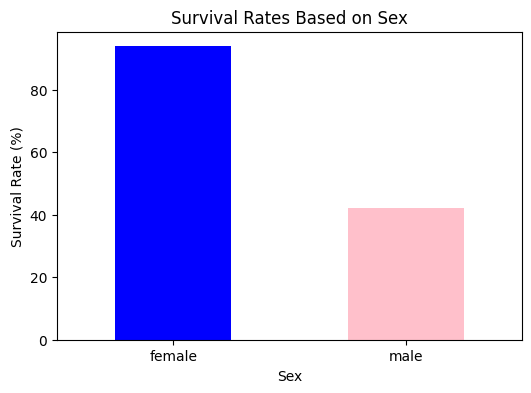

In [62]:
# Calculate survival rates based on 'Sex'
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100  # Convert to percentage

# Plot the survival rates based on sex
plt.figure(figsize=(6, 4))
survival_by_sex.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Rates Based on Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels to make them horizontal
plt.show()


In [63]:
# Calculate Survival Rates Based on Passenger Class

In [64]:
# Calculate survival rates based on 'Pclass' (Passenger Class)
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# Display the survival rates by passenger class
print("Survival Rates Based on Passenger Class:")
print(survival_by_class * 100)  # Convert to percentage


Survival Rates Based on Passenger Class:
Pclass
1    66.477273
2    81.250000
3    50.000000
Name: Survived, dtype: float64


In [65]:
# df.groupby('Pclass'): Groups the dataset by the Pclass column, which divides the data into three groups: 1st, 2nd, and 3rd class.
# ['Survived'].mean(): For each class, calculates the mean of the Survived column, giving the survival rate for that class.
# Multiplying by 100: Converts the survival rate into a percentage.

In [66]:
# visualize  Survival Rates Based on Passenger Class

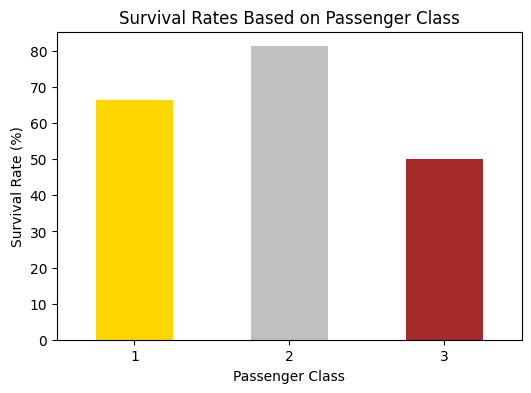

In [67]:
# Calculate survival rates based on 'Pclass' (Passenger Class)
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100  # Convert to percentage

# Plot the survival rates based on passenger class
plt.figure(figsize=(6, 4))
survival_by_class.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Survival Rates Based on Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.show()


In [68]:
# df.groupby('Pclass')['Survived'].mean(): Groups the dataset by the Pclass (passenger class) column and calculates the survival rate for each class.
# Multiplying by 100: Converts the survival rate into percentage.
# plt.figure(figsize=(6, 4)): Sets the size of the plot.
# survival_by_class.plot(kind='bar'): Plots a bar chart for the survival rates.
# color=['gold', 'silver', 'brown']: Sets distinct colors for each class.
# plt.xticks(rotation=0): Ensures that the x-axis labels (1st, 2nd, 3rd) are displayed horizontally for better readability.
# Output:
# This will display a bar chart showing the survival rates for each of the passenger classes, which will allow for a direct comparison of survival chances across different classes.

In [69]:
# Correlation Analysis

Correlation Matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.110153 -0.082977  0.039594 -0.079741 -0.063456   
Survived        0.110153  1.000000 -0.033032 -0.219651  0.132599  0.038081   
Pclass         -0.082977 -0.033032  1.000000 -0.288407 -0.084097  0.058366   
Age             0.039594 -0.219651 -0.288407  1.000000 -0.141649 -0.244476   
SibSp          -0.079741  0.132599 -0.084097 -0.141649  1.000000  0.265411   
Parch          -0.063456  0.038081  0.058366 -0.244476  0.265411  1.000000   
Fare            0.017243  0.128306 -0.311713 -0.071707  0.290696  0.383972   
FamilySize     -0.089108  0.102705 -0.009499 -0.247126  0.759869  0.828439   

                 Fare  FamilySize  
PassengerId  0.017243   -0.089108  
Survived     0.128306    0.102705  
Pclass      -0.311713   -0.009499  
Age         -0.071707   -0.247126  
SibSp        0.290696    0.759869  
Parch        0.383972    0.828439  
Fare         1.000000    

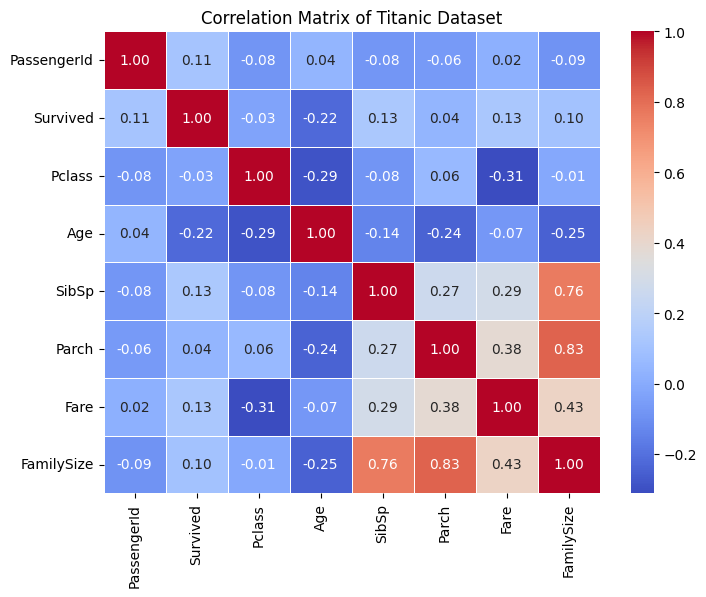

In [71]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()



In [72]:
# df.select_dtypes(include=[np.number]): This selects only the numerical columns from the DataFrame, filtering out non-numeric columns like Name, Sex, etc.
# correlation_matrix = numerical_columns.corr(): Calculates the correlation matrix for the filtered numerical columns.
# Rest of the code: Same as before to display the correlation matrix and visualize it with a heatmap.
# Output:
# This will compute and display the correlation matrix for only the numerical columns in your dataset (such as Age, Fare, Survived, etc.), and the heatmap will visualize the relationships between these variables.

In [73]:
# Visualize Correlation Matrix

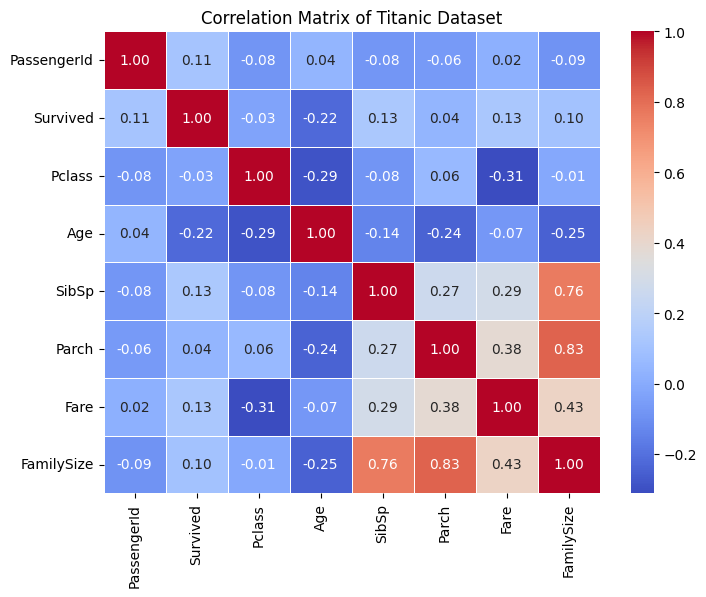

In [74]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()
